# LEGO Dataset Analysis
<img src="https://c.files.bbci.co.uk/92F3/production/_114391673_gettyimages-1158923430.jpg">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("data/colors.csv")

In [3]:
df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [10]:
df["name"].nunique()

135

In [7]:
df.groupby("is_trans").count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


or

In [11]:
df.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

### Understanding LEGO Themes vs LEGO sets

Walk into a LEGO store and you will see their products organised by theme. Their themes includes Star Wars, Batman, HArry Potter and many more.
<img src="assets/lego_themes.png">

A LEGO **set** is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.
<img src="assets/lego_sets.png">

In [13]:
sets = pd.read_csv("data/sets.csv")

In [14]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [21]:
sets.sort_values(by=["year"]).head(1)

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142


In [39]:
grp = sets.groupby("year")
sets2 = grp.apply(lambda x:x["name"].unique())
sets2.head(1).explode()

year
1949           Extra-Large Gift Set (ABB)
1949                 Large Gift Set (ABB)
1949                Medium Gift Set (ABB)
1949                Small Brick Set (ABB)
1949    Small Doors and Windows Set (ABB)
dtype: object

or

In [42]:
sets["name"].loc[sets["year"]==1949]

9521           Extra-Large Gift Set (ABB)
9534                 Large Gift Set (ABB)
9539                Medium Gift Set (ABB)
9544                Small Brick Set (ABB)
9545    Small Doors and Windows Set (ABB)
Name: name, dtype: object

In [46]:
sets["num_parts"].max()

9987

In [51]:
sets.sort_values(by=["num_parts"], ascending=False).head(5)

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


In [55]:
sets_by_year = sets.groupby("year").count()
sets_by_year["set_num"].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

In [56]:
sets_by_year["set_num"].tail()

year
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, dtype: int64

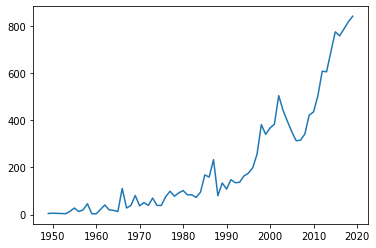

In [58]:
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

In [61]:
themes_by_year = sets.groupby("year").agg({"theme_id":pd.Series.nunique})
themes_by_year.rename(columns={"theme_id":"nr_themes"}, inplace=True)
themes_by_year

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


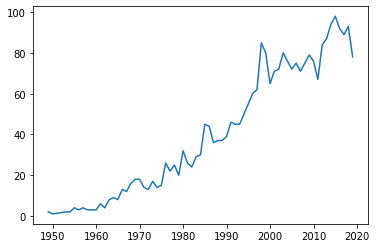

In [66]:
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])

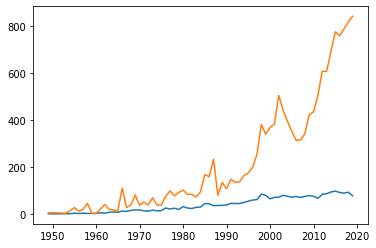

In [68]:
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])


Text(0, 0.5, '#Themes')

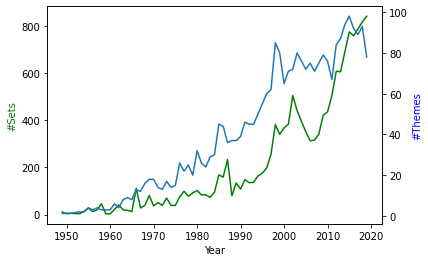

In [73]:
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2],color="g")
ax2.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])
ax1.set_xlabel("Year")
ax1.set_ylabel("#Sets", color="green")
ax2.set_ylabel("#Themes", color="blue")

In [76]:
parts_per_set = sets.groupby("year").agg({"num_parts":pd.Series.mean})
parts_per_set

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2017,221.840967
2018,213.618873
2019,207.510714


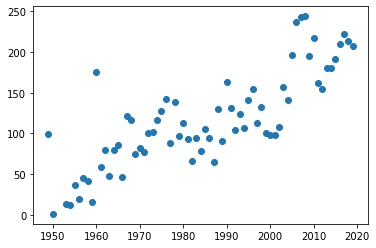

In [77]:
plt.scatter(parts_per_set.index[:-2], parts_per_set.num_parts[:-2])

In [80]:
set_theme_count = sets["theme_id"].value_counts()
set_theme_count[:5]

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

<img src="assets/rebrickable_schema.png">

In [81]:
theme = pd.read_csv("data/themes.csv")

In [82]:
theme.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [92]:
theme[theme.name=="Star Wars"]

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [97]:
sets[sets.theme_id==18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


Star Wars is a really long-running franchise. Theme number 18 was running from 2000 to 2002 and seems to be comprised of several of the show's characters.

In [94]:
theme.columns

Index(['id', 'name', 'parent_id'], dtype='object')

In [95]:
sets.columns

Index(['set_num', 'name', 'year', 'theme_id', 'num_parts'], dtype='object')

In [98]:
sets[sets.theme_id==209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


In [99]:
set_theme_count = sets["theme_id"].value_counts()
set_theme_count[:5]

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

In [100]:
set_theme_count = pd.DataFrame({"id":set_theme_count.index, "set_count":set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [102]:
merged_df = pd.merge(set_theme_count, theme, on="id")
merged_df[:3]

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN


<BarContainer object of 10 artists>

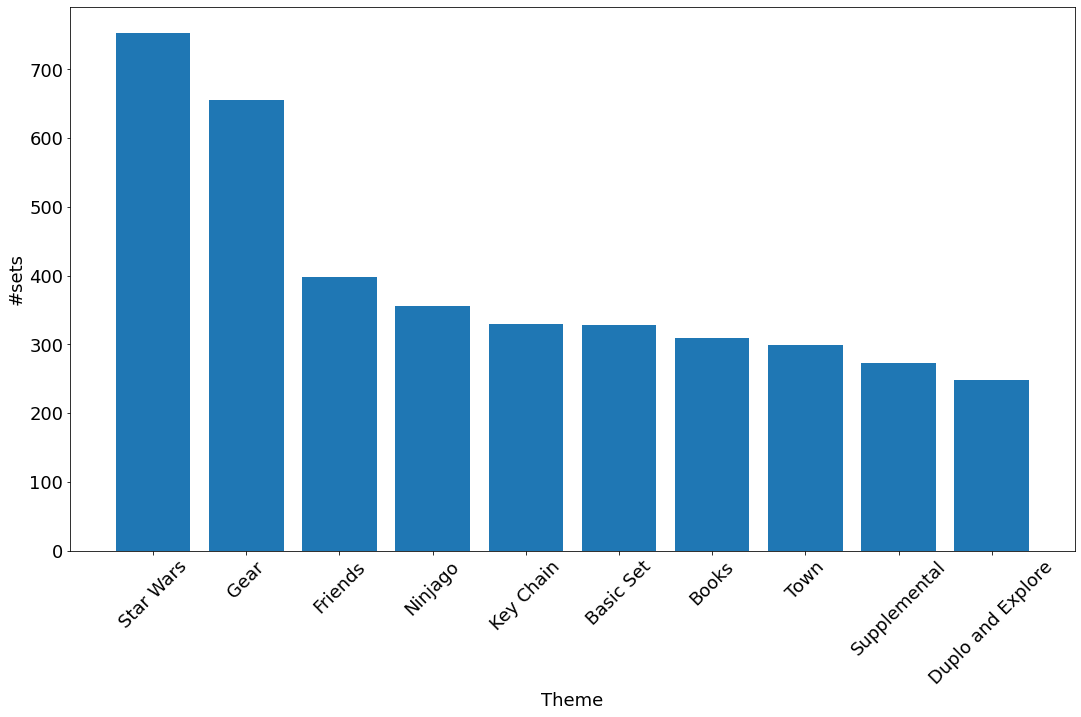

In [115]:
plt.figure(figsize=(18,10))
plt.xticks(fontsize=18, rotation=45)
plt.yticks(fontsize=18)
plt.ylabel("#sets", fontsize=18)
plt.xlabel("Theme", fontsize=18)
plt.bar(merged_df.name[:10], merged_df.set_count[:10])